<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/mnist_keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.
ytrain=to_categorical(ytrain)
ytest =to_categorical(ytest)

xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000, 28*28)

11501568/11490434 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


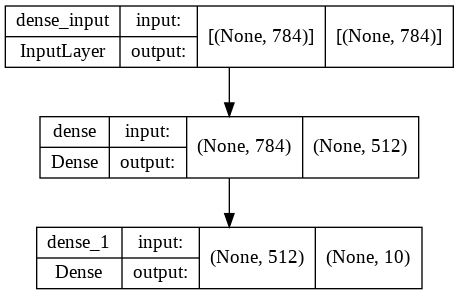

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='mnist_keras.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(xtrain, ytrain, epochs=10, batch_size=128)
test_loss, test_accu = model.evaluate(xtest, ytest)
print(test_loss, test_accu)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2568 - accuracy: 0.9254
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1028 - accuracy: 0.9695
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0486 - accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0360 - accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0282 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0215 - accuracy: 0.9939
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0165 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0125 - accuracy: 0.9965
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0638 - accurac

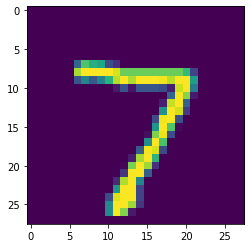

[6.2095847e-13 4.8632659e-15 9.6317024e-11 6.0843450e-07 7.5270809e-17
 1.2148929e-11 6.3079391e-20 9.9999940e-01 4.7083022e-11 5.3582379e-09]
1.0
7
Precision score: 0.9826672537787818
Recall score   : 0.9826284064278299
Confusion Matrix
[[ 971    0    1    0    0    2    3    1    2    0]
 [   0 1129    2    1    0    1    1    1    0    0]
 [   2    2 1007    1    3    1    2    7    7    0]
 [   0    0    3  996    0    2    0    4    1    4]
 [   1    0    1    1  968    0    3    2    0    6]
 [   2    0    0    9    0  875    2    0    2    2]
 [   4    2    0    1    3    4  944    0    0    0]
 [   0    3    6    1    0    0    0 1012    3    3]
 [   1    2    3    6    3    8    2    3  941    5]
 [   1    2    0    6    7    4    0    2    2  985]]


<Figure size 432x288 with 0 Axes>

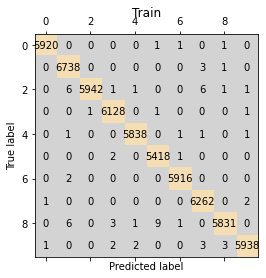

<Figure size 432x288 with 0 Axes>

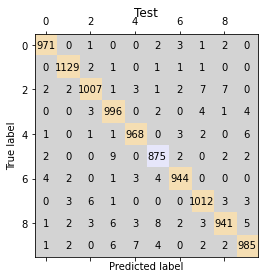

In [ ]:
ypred = model.predict(xtest)
plt.imshow(xtest[0].reshape(28,28))
plt.show()
print(ypred[0])
print(ypred[0].sum())
print(ypred[0].argmax())

predicted_labels = np.argmax(ypred, axis=-1)
actual_labels = np.argmax(ytest, axis=-1)

print('Precision score:', precision_score(actual_labels, predicted_labels, average='macro'))
print('Recall score   :', recall_score(actual_labels, predicted_labels, average='macro'))


print('Confusion Matrix')
print(confusion_matrix(ytest.argmax(1), ypred.argmax(1)))

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(ytest, ypred, title):
  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(ytrain.argmax(1), model.predict(xtrain).argmax(1), title='Train')
cm(ytest.argmax(1), model.predict(xtest).argmax(1), title='Test')